In [ ]:
#IMPORTS
import numpy as np
from Crypto.Cipher import AES
from Crypto.Hash import MD5
from Crypto.Util.Padding import pad, unpad

Veillez à utiliser un kernel Sagemath et non python !

# CSIDH

https://csidh.isogeny.org/csidh-20181118.pdf

*A la différence de l'implémentation classique de CSIDH, nous n'utiliserons que des coefficients positifs dans la clef privée (cela simplifie l'implémentation temps constant et les concepts mathématiques utilisés)*

## Construction de $p\in\mathcal{P}$
* On choisit n petits nombres premiers $l_1,...,l_n$
* On vérifie que $p=4.l_1....l_n-1$ est premier
* On s'intéresse aux $l_i$-isogénies entre les éléments de X

In [ ]:
li = [3,5,7]
p = ........
assert(is_prime(p))
K = GF(p) #K est maintenant assimilé à Fp ou Z/pZ

## Ensemble de courbes elliptiques
* On se place sur l'ensemble $X=\{\text{Courbes elliptiques supersingulières sur }\mathbb{F}_p\text{ de la forme } y²=x³+Ax²+x \}$

In [ ]:
E0 = EllipticCurve(K, [0, 0, 0, 1, 0])
E0

In [ ]:
#Renvoi la courbe elliptique E : y²=x³+Ax²+x
def curve_from_A(A):
    try:
        E = EllipticCurve(K,[........])
    except:
        return False
    return E

## Calculs d'isogénies

* Une isogénie est un morphisme non nul décrit par des fonctions rationnelles entre deux courbes elliptiques E et E'

$$ \varphi \text{ : } E \to E'$$

$$(x,y)\mapsto (R(x,y),R(x,y))$$

* On s'intéresse aux $l_i$-isogénies entre les éléments de X, c'est à dire aux isogénies de degré li.
* Le degré d'une isogénie est la taille de son noyau (dans notre cas).

### Graphe d'isogénie

* Les sommets sont des courbes elliptiques de X
* Les arêtes sont les $l_i$-isogénies

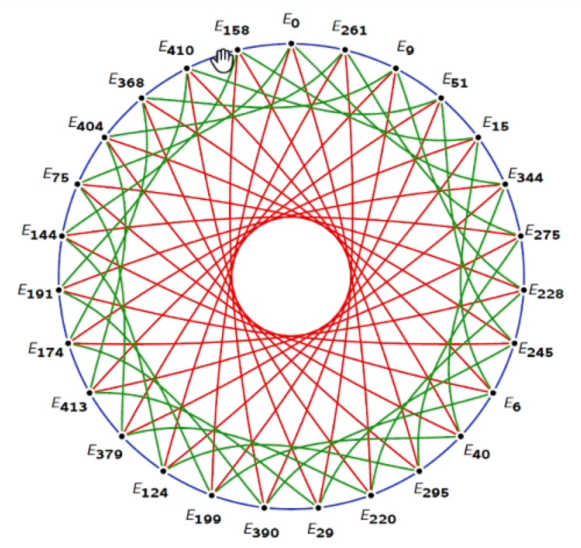

### Formules de Vélu

Donne les étapes pour passer d'une courbe E à une courbe E' avec une isogénie de degré $l$ :

* On trouve P un point d'ordre $l$ sur la courbe E et on note  $\forall i\in[|1,l[|$,   $x_i$ la coordonnée en x de $iP$
* On calcule :
$$\tau = \prod^{l-1}_{i=1} x_i \text{, } \quad \sigma= \sum_{i=1}^{l-1}\left(x_i-\dfrac{1}{x_i}\right)\text{, } \quad f(x)=x\prod_{i=1}^{l-1}\dfrac{xx_i-1}{x-x_i}$$
* On obtient alors la $l$-isogénie de noyau $\langle P \rangle$ :

$$\varphi_l \text{: } E_A \to E_B$$

$$(x,y)\mapsto (f(x), c_0yf'(x))$$

Où $B=\tau(A-3\sigma)$ et $c_0²=\tau$

La courbe d'arrivée de dépend que de l'ordre $l$ !

In [ ]:
# Renvoie la courbe d'arrivée en partant d'une courbe elliptique E et en passant par une isogénie de degré l
def Velu(P, E): # E une courbe elliptique et P un point de E d'ordre l
    # Calcul des xi
    iP = P
    X = []
    for _ in range(P.order() - 1):
        X.append(iP[0])
        iP = ......
    X = np.array(X)

    # Calcul de tau
    tau = ......

    # Calcul de sigma
    sigma = 0
    .......
    .......

    # Calcul de B, l'indice de la courbe d'arrivée
    B = .........

    return curve_from_P(B)

In [ ]:
assert(Velu(E0(178, 367), E0) == curve_from_A(158))

### Evaluer l'action de groupe

On veut maintenant évaluer un chemin entier d'isogénies comme proposé dans la description de CSIDH : 

(on utilise uniquement des coefficients positifs pour le chemin d'isogénies)

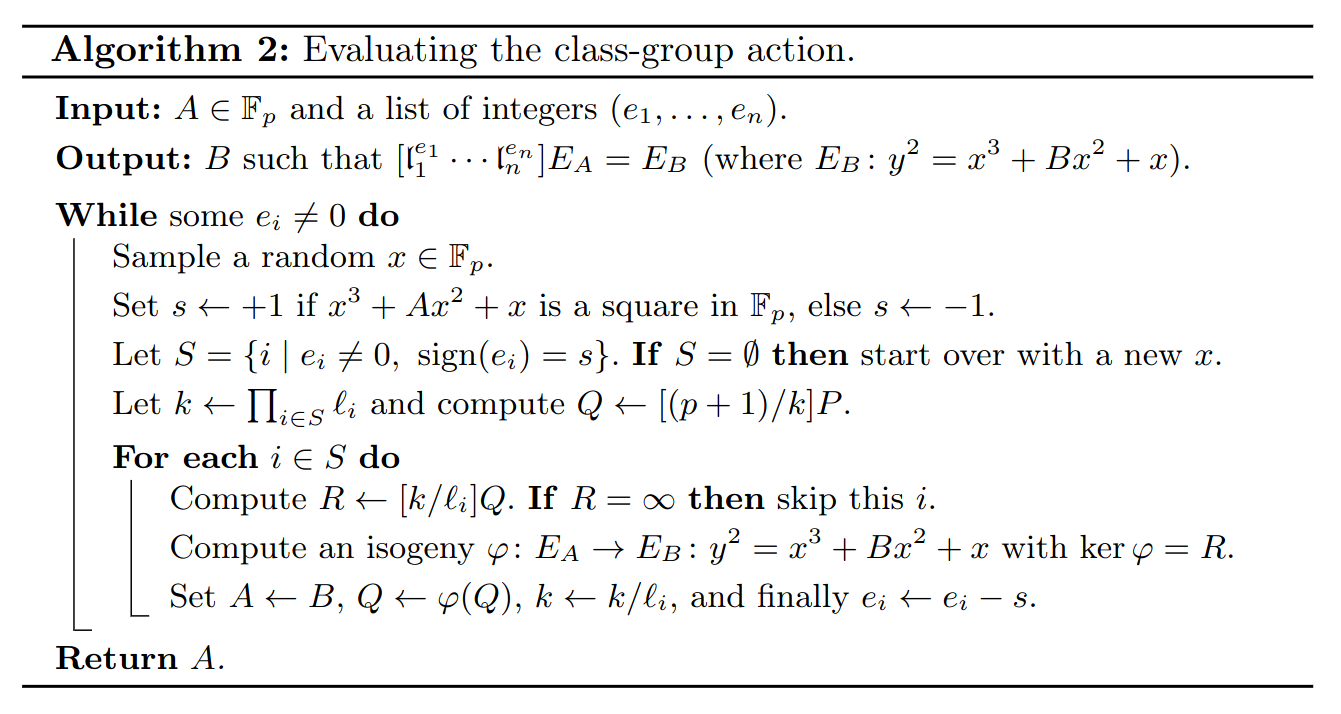

NOTES : Il n'est pas nécessaire de calculer l'isogénie phi elle-même, il suffit de calculer le nouveau B à l'aide de la fonction Velu complétée précédemment. L'opération Q = phi(Q) n'est pas non plus nécessaire: on peut remplacer Q par n'importe quel point de EB adapté, et pas forcément par phi(Q).

In [ ]:
# Renvoie la courbe d'arrivée en partant de la courbe elliptique EA et en suivant le "chemin d'isogénies" représenté par C
def evaluate_class_group_action_positive(A, Chemin): # avec A le coefficient de la courbe de départ et Chemin = [e1, e2, ..., en] le chemin représenté par la classe d'idéaux
    C = Chemin.copy()
    lis = [3, 5, 7]
    curve = curve_from_A(A)
    assert(curve.is_supersingular())
    while C.any():
        x = K.random_element()
        try :
            P = curve.lift_x(x)
        except: # Il n'y a pas de point de coordonnée x sur la courbe elliptique
            _ # Pas important pour nous puisque l'on ne prend que des chemins positifs
        else: # P est un point de coordonnée x sur la courbe elliptique
            .....

            .....





            ......


    return curve


In [ ]:
curve = evaluate_class_group_action_positive(0, np.array([4, 1, 1]))
assert(curve == curve_from_A(275))

# Diffie Hellman

On fait un échange de clef Diffie-Hellman grâce à la commutativité de l'action de groupe engendrée par un "chemin d'isogénie" sur l'ensemble de nos courbes elliptiques !

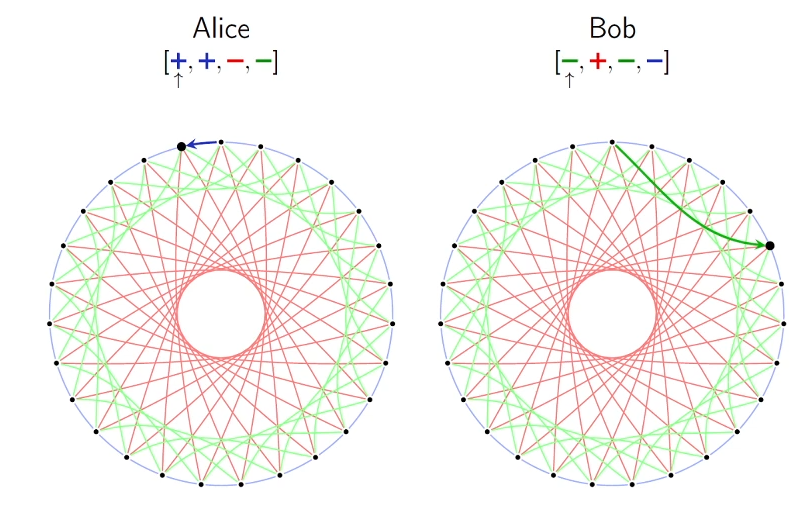

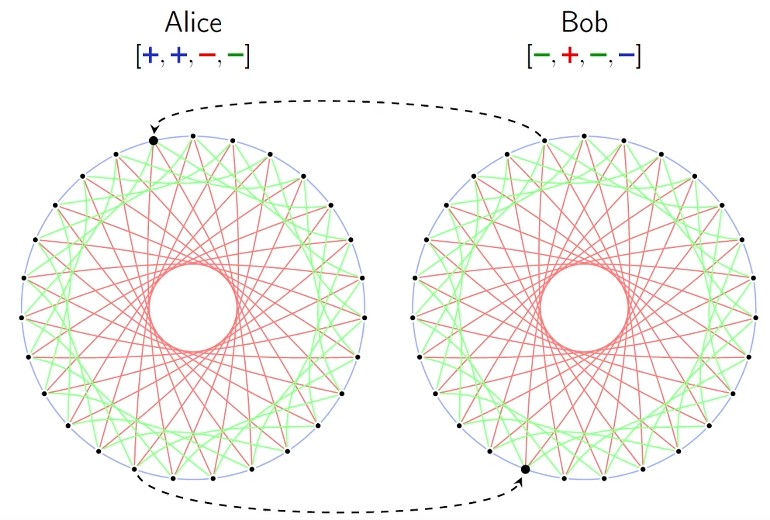

In [ ]:
Private_key = np.array([6, 7, 8])
Public_key = evaluate_class_group_action_positive(...........).a2()

In [ ]:
# Reçu d'Alice :
Alice_public_key = 245

In [ ]:
Shared_secret = evaluate_class_group_action_positive(............).a2()

In [ ]:
# La clef est composée des 16 premiers bytes du MD5 du Shared_secret
hash = MD5.new(long_to_bytes(int(Shared_secret)))
key=hash.digest()[:16]

In [ ]:
def decrypt_message(encrypted_message, key):
    cipher = AES.new(key, AES.MODE_ECB)
    decrypted_message = cipher.decrypt(encrypted_message)
    unpadded_message = unpad(decrypted_message, AES.block_size)
    return unpadded_message.decode()

In [ ]:
chiffré = b'\xe67\x98\xc7\xccU5\xf5\xd2\xfd\xd4\x88\x9d\x16\x98r<\x92\xb6\xc0\x1f\xf9\x04\xf8xj\x1f\xa5e\xbe&\x8b\xbd\x04\xe8\xb8m\x92\x98\xbf\xcd\xa5\xaa~\x93\xa8^\xee_\x8a\xd0O\xce\xeb\x83\xdc\xf6\xbb\xd3\xb6\x0c5\x88)\x0c\xa6l[\ni;{\xe9\xe4\xe9\xf7G)c\x08'

In [ ]:
decrypt_message(chiffré, key)

Bonne chance pour les vrai challenges sur CSIDH qui suivent celui-ci !

Si vous avez des questions envoyez-les nous **@phengar** et **@titouanreal** sur le discord :)

Images des graphes d'isogénie par Tanja Lange : https://www.youtube.com/@tanjalangepost-quantumcryp2802
Image de l'algorithme d'évalutation de l'action de groupe : https://csidh.isogeny.org/csidh-20181118.pdf